In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
from mle_toolbox import load_result_logs
from mle_toolbox.visualize import visualize_2D_grid
from visualize import imp_plot


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
meta_log_gd, hyper_log_gd = load_result_logs(f"../experiments/sgd/ant")
hyper_log_gd

/Users/rob/anaconda3/envs/mle-toolbox/lib/python3.9/site-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


  env_name imp_config/baseline_name  time_elapsed      run_id   final_perf                                          log_paths                      experiment_dir                                       config_fname                                         model_ckpt                                     seeds model_type                                          log_fname
0      ant             final-ticket   9707.605299  b_1_eval_0  3977.595947  [experiments/ppo/ant_ppo/b_1_eval_0/logs/log_s...  experiments/ppo/ant_ppo/b_1_eval_0  experiments/ppo/ant_ppo/b_1_eval_0/b_1_eval_0....  [experiments/ppo/ant_ppo/b_1_eval_0/models/fin...  [176588, 363028, 381632, 562958, 924197]        jax  experiments/ppo/ant_ppo/b_1_eval_0/logs/b_1_ev...

## IMP Across Brax Environments + Baselines

In [6]:
def get_perf_env(meta_log_es, hyper_log_es,
                 meta_log_ot, hyper_log_ot,
                 meta_log_gd, hyper_log_gd,
                 es_main, es_other,
                 no_gd=False, plot_other=True):
    """Filter dataframe for environment and popsize."""
    results = {}
    run_id_es = hyper_log_es.filter({"imp_config/baseline_name": "sig2noise"}).run_id.iloc[0]
    es_perf = meta_log_es[run_id_es].stats.final_perf
    if plot_other:
        results[es_main] = es_perf
    else:
        results["ES"] = es_perf

    if plot_other:
        for es_ot in es_other:
            run_id_es = hyper_log_ot.filter({"strategy_name": es_ot}).run_id.iloc[0]
            es_perf = meta_log_ot[run_id_es].stats.final_perf
            results[es_ot] = es_perf

    myKeys = list(results.keys())
    myKeys.sort()
    results = {i: results[i] for i in myKeys}
    if not no_gd:
        gd_perf = meta_log_gd["b_1_eval_0"].stats.final_perf
        results["GD"] = gd_perf
    return results

/Users/rob/anaconda3/envs/mle-toolbox/lib/python3.9/site-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]


/Users/rob/anaconda3/envs/mle-toolbox/lib/python3.9/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/rob/anaconda3/envs/mle-toolbox/lib/python3.9/site-packages/numpy/lib/function_base.py:4488: RuntimeWarning: invalid value encountered in add
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))


[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]


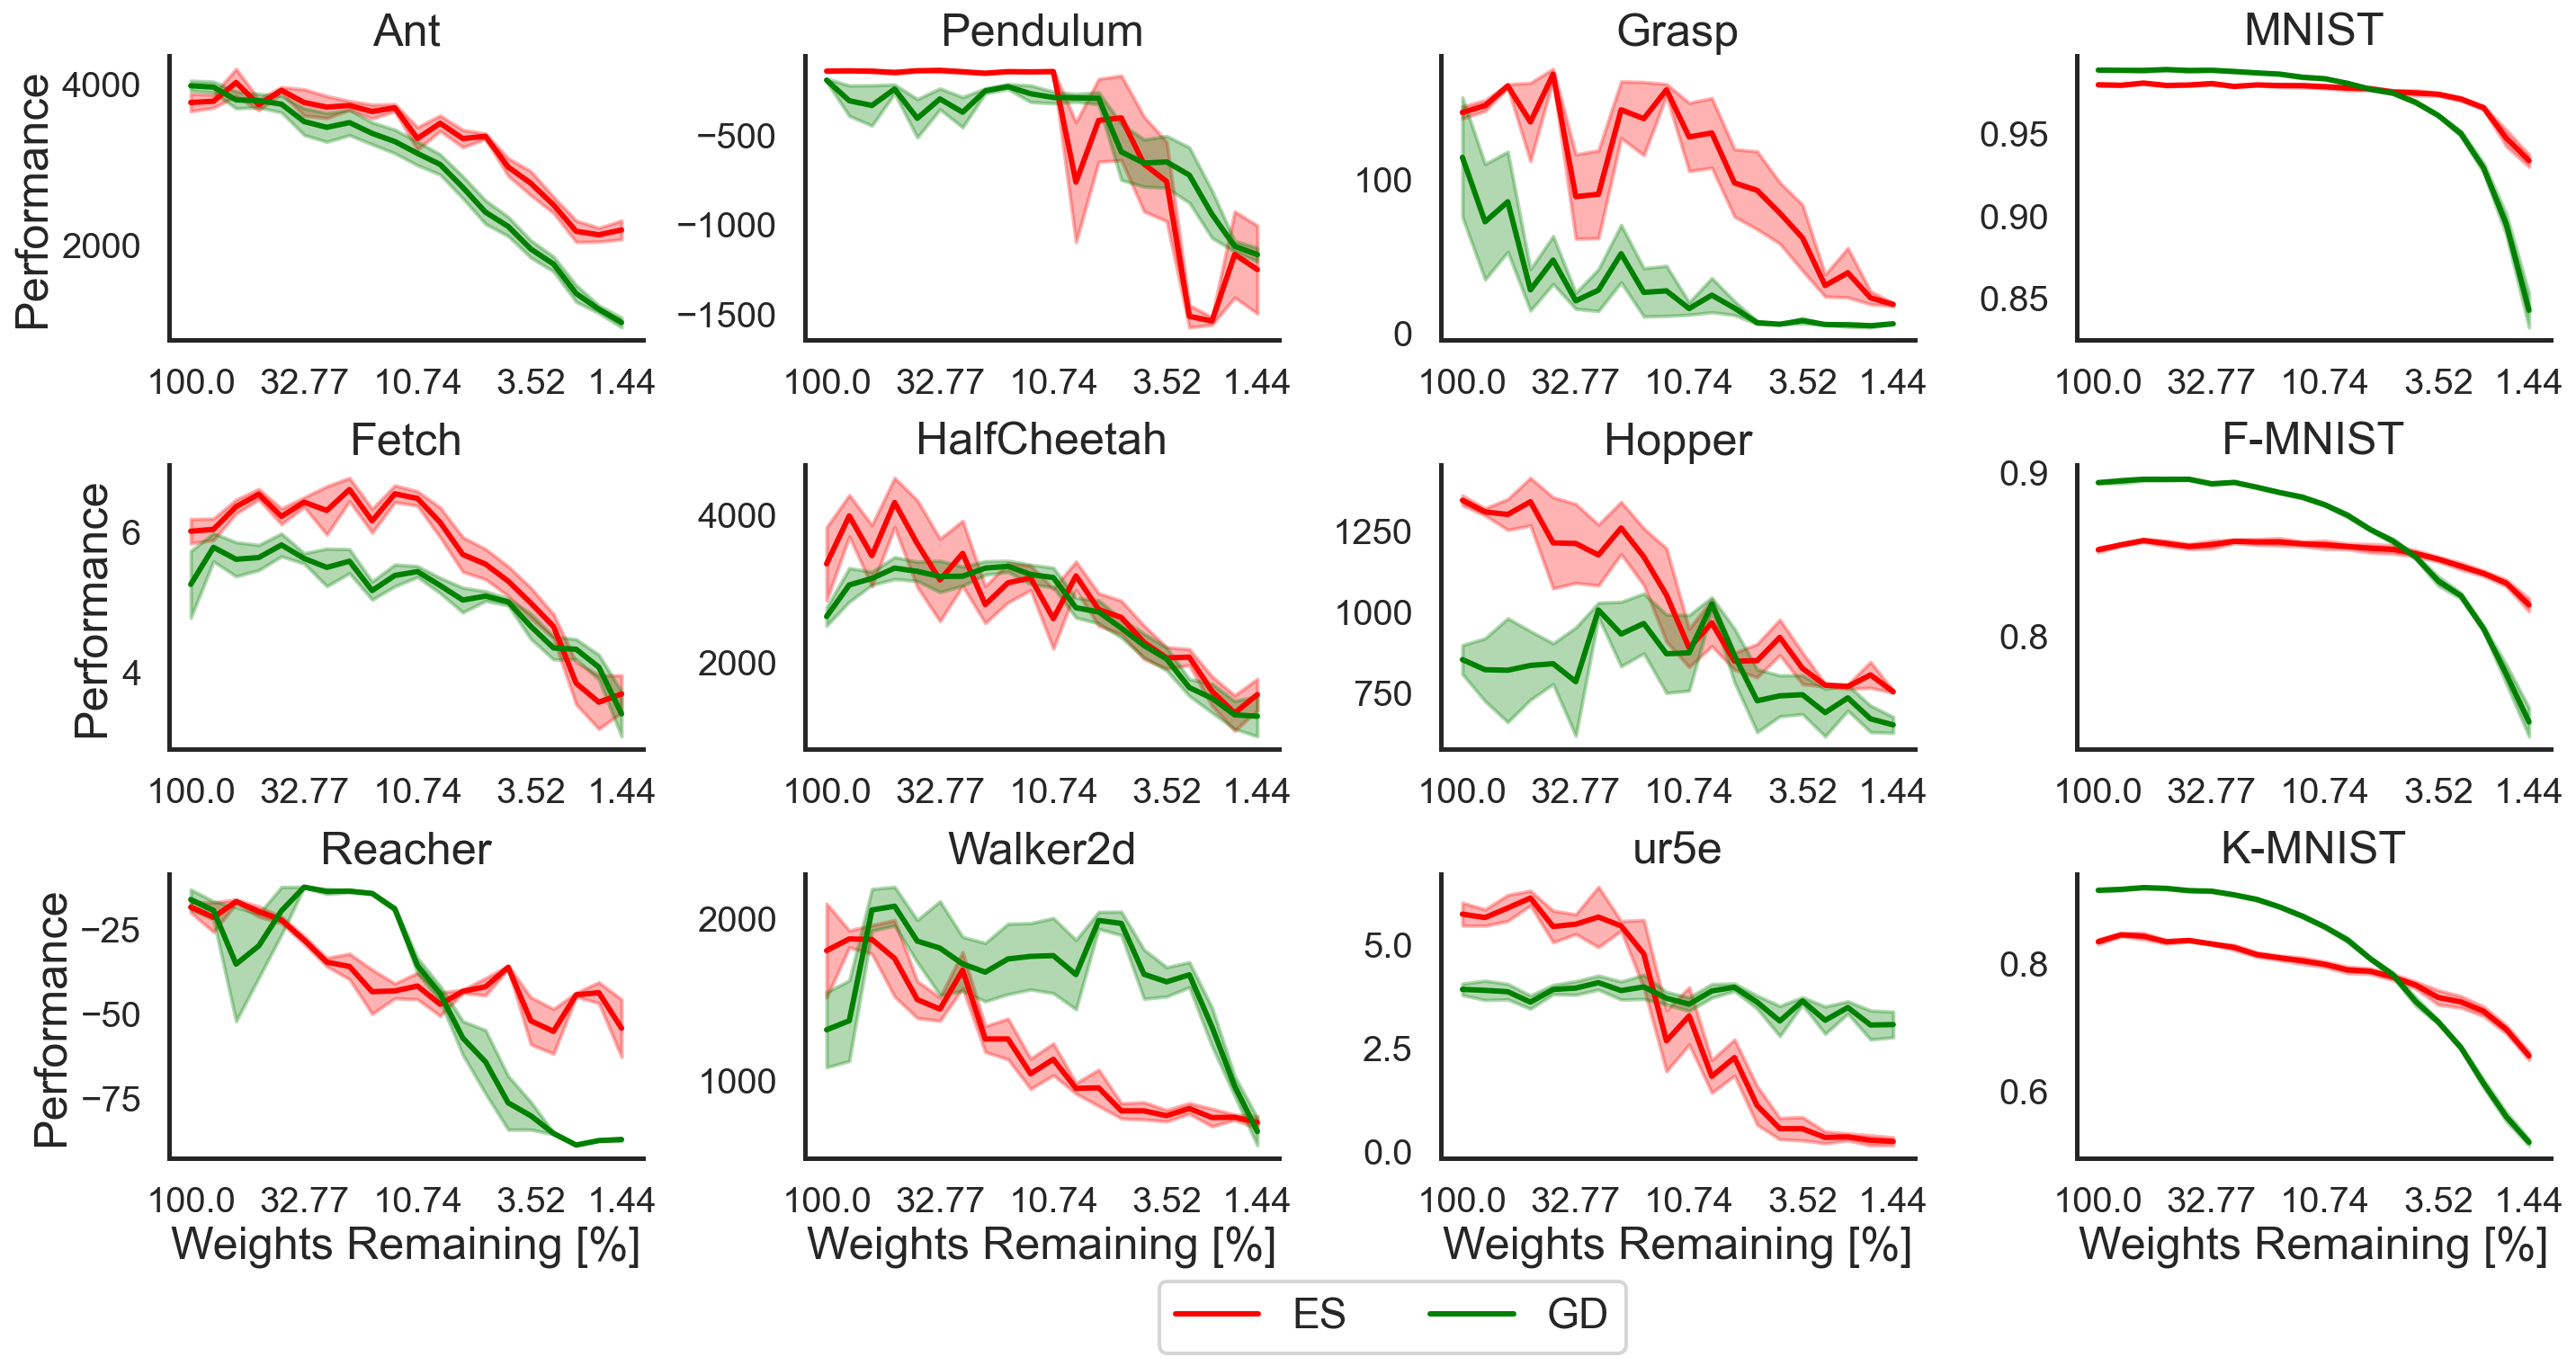

In [7]:
figsize = (20, 10)
fig, axs = plt.subplots(3, 4, figsize=figsize)
labels = [
    'Ant: Sep-CMA-ES', 'Pendulum: Sep-CMA-ES', 'Grasp: Sep-CMA-ES', 'MNIST: Sep-CMA-ES',
    'Fetch: SNES', 'HalfCheetah: SNES', 'Hopper: SNES', 'F-MNIST: SNES',
    'Reacher: PGPE', 'Walker2d: PGPE', 'ur5e: PGPE', 'K-MNIST: PGPE'
    
]
labels = [
    'Ant', 'Pendulum', 'Grasp', 'MNIST',
    'Fetch', 'HalfCheetah', 'Hopper', 'F-MNIST',
    'Reacher', 'Walker2d', 'ur5e', 'K-MNIST'
    
]

for i, env_strat in enumerate([
    'ant_sepcma', 'pendulum_sepcma', 'grasp_sepcma', 'mnist_sepcma',
    'fetch_snes', 'halfcheetah_snes', 'hopper_snes', 'fmnist_snes',
    # 'reacher_pgpe', 'ur5e_pgpe', 'walker2d_pgpe', 'kmnist_pgpe'
    'reacher_pgpe_crv_v2', 'walker2d_pgpe_crv_v2', 'ur5e_pgpe_crv_v2', 'kmnist_pgpe_crv'
    ]):
    split_env = env_strat.split("_")
    meta_log_es, hyper_log_es = load_result_logs(f"../experiments/blines/{env_strat}")
    meta_log_ot, hyper_log_ot = load_result_logs(f"../experiments/es/{split_env[0]}")
    meta_log_gd, hyper_log_gd = load_result_logs(f"../experiments/sgd/{split_env[0]}")
    if split_env[1] == "sepcma":
        es_main = "Sep_CMA_ES"
        es_other = ["SNES", "PGPE", "DES"]
    elif split_env[1] == "snes":
        es_main = "SNES"
        es_other = ["Sep_CMA_ES", "PGPE", "DES"]
    elif split_env[1] == "pgpe":
        es_main = "PGPE"
        es_other = ["Sep_CMA_ES", "SNES", "DES"]
    results = get_perf_env(meta_log_es, hyper_log_es,
                           meta_log_ot, hyper_log_ot,
                           meta_log_gd, hyper_log_gd,
                           es_main, es_other, plot_other=False)
    plot_legend = i == 7
    plot_ylabel = i in [0, 4, 8]
    plot_xlabel = i in [8, 9, 10, 11]
    imp_plot(results,
            num_imp_iters=20,
            plot_title=labels[i],
            curve_labels=list(results.keys()),
            colors=["r", "g"],
            # colors=["r", "orange", "yellow", "b", "g"],
            fig=fig, ax=axs.flatten()[i],
            plot_legend=False,
            plot_ylabel=plot_ylabel,
            plot_xlabel=plot_xlabel)
handles, labels = axs.flatten()[0].get_legend_handles_labels()
fig.legend(handles, labels, loc = (0.45, -0.1), ncol=3, bbox_to_anchor=(0.45, -0.05))

# fig.tight_layout()

In [8]:
def normalize(results):
    all_res = {}
    all_means = [results[k].mean[:20] for k in results.keys()]
    all_val = np.stack(all_means)
    min_val, max_val = np.min(all_val), np.max(all_val)
    
    def norm_0_1(arr_m, arr_s):
        return ((arr_m - min_val)/(max_val - min_val),
                 arr_s/(max_val - min_val))
    
    for k in results.keys():
        mean_, std_ = norm_0_1(results[k].mean[:20], results[k].std[:20])
        all_res[k] = {"mean": mean_, "std": std_}
    return all_res

In [11]:
es_mean, gd_mean = [], []
es_std, gd_std = [], []

for i, env_strat in enumerate([
    'ant_sepcma', 'pendulum_sepcma', 'grasp_sepcma', 'mnist_sepcma',
    'fetch_snes', 'halfcheetah_snes', 'hopper_snes', 'fmnist_snes',
    # 'reacher_pgpe', 'ur5e_pgpe', 'walker2d_pgpe', 'kmnist_pgpe'
    'reacher_pgpe_crv_v2', 'walker2d_pgpe_crv_v2', 'ur5e_pgpe_crv_v2', 'kmnist_pgpe_crv'
                               ]):
    split_env = env_strat.split("_")
    meta_log_es, hyper_log_es = load_result_logs(f"../experiments/blines/{env_strat}")
    meta_log_ot, hyper_log_ot = load_result_logs(f"../experiments/es/{split_env[0]}")
    meta_log_gd, hyper_log_gd = load_result_logs(f"../experiments/sgd/{split_env[0]}")
    if split_env[1] == "sepcma":
        es_main = "Sep_CMA_ES"
    elif split_env[1] == "snes":
        es_main = "SNES"
    elif split_env[1] == "pgpe":
        es_main = "PGPE"
    results = get_perf_env(meta_log_es, hyper_log_es,
                           meta_log_ot, hyper_log_ot,
                           meta_log_gd, hyper_log_gd,
                           es_main, [], plot_other=False)
    norm_res = normalize(results)
    es_mean.append(norm_res["ES"]["mean"])
    es_std.append(norm_res["ES"]["std"])
    gd_mean.append(norm_res["GD"]["mean"])
    gd_std.append(norm_res["GD"]["std"])

[100.0, 32.77, 10.74, 3.52, 1.44]


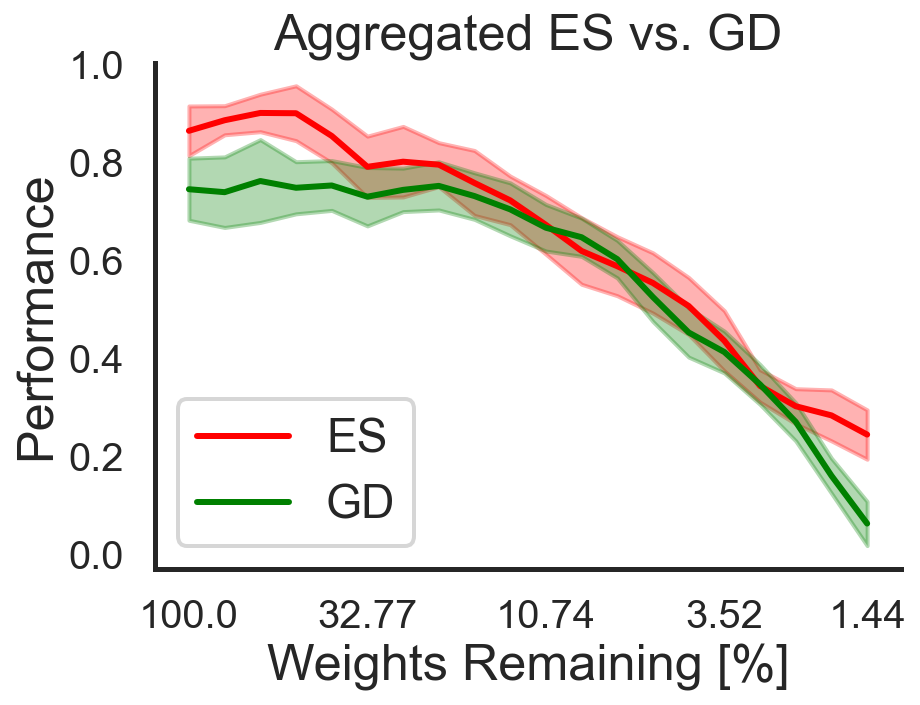

In [12]:
results = {
    "ES": {
        "mean": np.mean(np.array(es_mean), axis=0),
        "std": np.mean(np.array(es_std), axis=0),
    },
    "GD": {
        "mean": np.mean(np.array(gd_mean), axis=0),
        "std": np.mean(np.array(gd_std), axis=0),
    },
}

fig, ax = plt.subplots(figsize=(6.5, 5))
imp_plot(results, fig, ax, num_imp_iters=20,
         curve_labels=["ES", "GD"],
         colors=["r", "g"],
         plot_title="Aggregated ES vs. GD",
         plot_legend=False, plot_xlabel=True, plot_ylabel=True)
ax.legend(loc="lower left")